In [140]:
#configuration
import os
import torch # PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
from textwrap import wrap
import seaborn as sns
import matplotlib.pyplot as plt
import re
import whois
import datetime
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

In [141]:
import pandas as pd
file_path = '/home/roy/Documents/last year/cyber/data.csv'
df = pd.read_csv(file_path)


In [142]:
#determine whether a CUDA-enabled GPU is available and set the device accordingly.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [143]:
df

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [144]:
df['label'].value_counts()

label
good    344821
bad      75643
Name: count, dtype: int64

In [145]:
'''
in the first step we need to do Data Preprocessing //need to do more
'''
df.drop_duplicates(subset=['url'], keep='first', inplace=True)

In [146]:
df_0 = df[df['label'] == 'bad'].copy()
df_1 = df[df['label'] == 'good'].copy()
df_0= df_0[:50000]
df_1= df_1[:50000]
df = pd.concat([df_0,df_1], ignore_index=True)
df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work
df

/tmp/ipykernel_10705/1502467353.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work


,url,label
0,diaryofagameaddict.com,0
1,espdesign.com.au,0
2,iamagameaddict.com,0
3,kalantzis.net,0
4,slightlyoffcenter.net,0
...,...,...
99995,flv.freeones.com/a_babes/Angela_Summers/1405/,1
99996,flv.freeones.com/c_babes/Charley_Chase/138/,1
99997,flv.freeones.com/c_babes/Charley_Chase/930/,1
99998,flwebster.com/,1


In [147]:

# Function to check if a URL uses an IP address
def uses_ip_address(url):
    ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
    return bool(ip_pattern.match(url))
    
def lengthurl(url):
    return len(url)

def countletters(url):
    count = 0
    for char in url:
        if char.isalpha():
            count += 1
    return count
    
def count_digits(url):
    count = 0
    for char in url:
        if char.isdigit():
            count += 1
    return count
    
def domain_age(url):
    try:
        domain_info = whois.whois(url)
        if domain_info.creation_date:
            age = (datetime.datetime.now() - domain_info.creation_date[0]).days
            return age
        else:
            return None
    except:
        return None

def count_letter_digit_letter(url):
    pattern = re.compile(r'[a-zA-Z]\d+[a-zA-Z]')
    occurrences = len(re.findall(pattern, url))
    return occurrences


def count_digit_letter_digit(url):
    pattern = re.compile(r'\d+[a-zA-Z]\d+')
    occurrences = len(re.findall(pattern, url))
    return occurrences

# Function to count delimiters and find the longest word length
def analyze_delimiters_and_longest_word(url):
    delimiters_count = {}
    longest_word_length = 0
    
    # Define delimiters as any non-alphanumeric characters
    delimiters = re.compile(r'[^a-zA-Z0-9]+')
    components = re.split(delimiters, url)
    
    # Iterate over the components
    for component in components:
        # Count delimiters in each component
        delimiters_count[component] = len(re.findall(delimiters, component))
        
        # Find the longest word length
        if len(component) > longest_word_length:
            longest_word_length = len(component)
    
    return delimiters_count, longest_word_length

def check_domain_reputation(domain):
    known_malicious_domains = ['maliciousdomain1.com', 'maliciousdomain2.net']  # need to add more
    if domain in known_malicious_domains:
        return True
    else:
        return False
        

def has_suspicious_keywords(url):
    suspicious_keywords = ['phishing', 'malware', 'scam']  # Add more 
    for keyword in suspicious_keywords:
        if keyword in url:
            return True
    return False
    
def has_subdomains(url):
    if len(url.split('.')) > 2:
        return 1
    else:
        return 0
    
def analyze_whois(domain):
    try:
        domain_info = whois.whois(domain)
        # You would analyze the WHOIS information here and return True/False based on some criteria
        # For simplicity, let's just return True if we get WHOIS information without errors
        return 1
    except:
        return 0

def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

df['https'] = df['url'].apply(lambda i: httpSecure(i))
df['uses_ip'] = df['url'].apply(uses_ip_address)
df['count_digits'] = df['url'].apply(count_digits)
df['count_letters'] = df['url'].apply(countletters)
df['length'] = df['url'].apply(lengthurl)
df['domain_age'] = df['url'].apply(domain_age)
df['letter_digit_letter_count'] = df['url'].apply(count_letter_digit_letter)
df['digit_letter_digit_count'] = df['url'].apply(count_digit_letter_digit)
df['delimiters_count'], df['longest_word_length'] = zip(*df['url'].apply(analyze_delimiters_and_longest_word))
df['domain_reputation'] = df['url'].apply(check_domain_reputation) #
df['has_suspicious_keywords'] = df['url'].apply(has_suspicious_keywords)
df['has_subdomains'] = df['url'].apply(has_subdomains)
df['whois_info'] = df['url'].apply(analyze_whois) #

In [148]:
df

,url,label,https,uses_ip,count_digits,count_letters,length,domain_age,letter_digit_letter_count,digit_letter_digit_count,delimiters_count,longest_word_length,domain_reputation,has_suspicious_keywords,has_subdomains,whois_info
0,diaryofagameaddict.com,0,0,False,0,21,22,None,0,0,"{'diaryofagameaddict': 0, 'com': 0}",18,False,False,0,0
1,espdesign.com.au,0,0,False,0,14,16,None,0,0,"{'espdesign': 0, 'com': 0, 'au': 0}",9,False,False,1,0
2,iamagameaddict.com,0,0,False,0,17,18,None,0,0,"{'iamagameaddict': 0, 'com': 0}",14,False,False,0,0
3,kalantzis.net,0,0,False,0,12,13,None,0,0,"{'kalantzis': 0, 'net': 0}",9,False,False,0,0
4,slightlyoffcenter.net,0,0,False,0,20,21,None,0,0,"{'slightlyoffcenter': 0, 'net': 0}",17,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,flv.freeones.com/a_babes/Angela_Summers/1405/,1,0,False,4,33,45,None,0,0,"{'flv': 0, 'freeones': 0, 'com': 0, 'a': 0, 'b...",8,False,False,1,0
99996,flv.freeones.com/c_babes/Charley_Chase/138/,1,0,False,3,32,43,None,0,0,"{'flv': 0, 'freeones': 0, 'com': 0, 'c': 0, 'b...",8,False,False,1,0
99997,flv.freeones.com/c_babes/Charley_Chase/930/,1,0,False,3,32,43,None,0,0,"{'flv': 0, 'freeones': 0, 'com': 0, 'c': 0, 'b...",8,False,False,1,0
99998,flwebster.com/,1,0,False,0,12,14,None,0,0,"{'flwebster': 0, 'com': 0, '': 0}",9,False,False,0,0


Accuracy: 0.6415
Train Loss: 0.6076302417435032
Test Loss: 0.6050651583397383
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.47      0.57     15055
           1       0.60      0.81      0.69     14945

    accuracy                           0.64     30000
   macro avg       0.66      0.64      0.63     30000
weighted avg       0.66      0.64      0.63     30000

Class-wise Metrics:
              precision    recall  f1-score     support
0              0.715086  0.474792  0.570676  15055.0000
1              0.604729  0.809435  0.692266  14945.0000
accuracy       0.641500  0.641500  0.641500      0.6415
macro avg      0.659908  0.642114  0.631471  30000.0000
weighted avg   0.660110  0.641500  0.631248  30000.0000


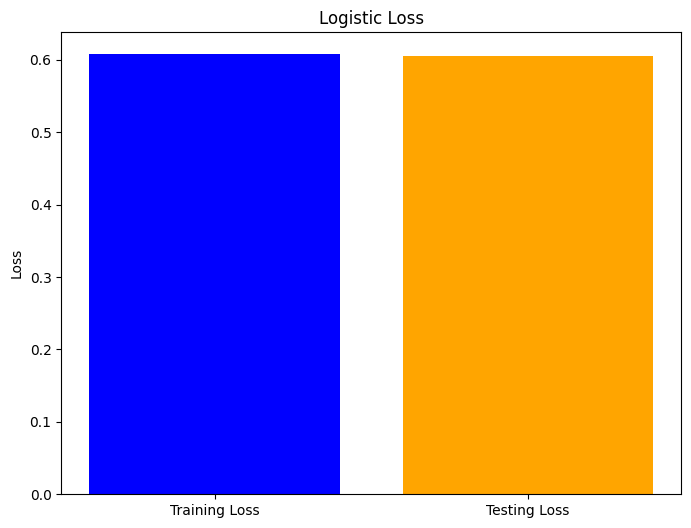

In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Define features (X) and target variable (y)
X = df[['uses_ip', 'count_letters', 'length', 'count_digits', 
        'letter_digit_letter_count', 'digit_letter_digit_count', 
        'longest_word_length', 'domain_reputation', 
        'has_suspicious_keywords', 'has_subdomains','https']]
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
train_loss = log_loss(y_train, model.predict_proba(X_train_imputed))
test_loss = log_loss(y_test, model.predict_proba(X_test_imputed))
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
class_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
print("Class-wise Metrics:")
print(class_report_df)
loss_values = [train_loss, test_loss]
labels = ['Training Loss', 'Testing Loss']

plt.figure(figsize=(8, 6))
plt.bar(labels, loss_values, color=['blue', 'orange'])
plt.title('Logistic Loss')
plt.ylabel('Loss')
plt.show()


2024-02-25 19:26:36.089020: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-25 19:26:39.626179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 19:26:39.626317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 19:26:40.018812: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-25 19:26:41.458329: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/10
2188/2188 [==============================] - 5s 2ms/step - loss: 0.6076 - accuracy: 0.6621 - val_loss: 0.5654 - val_accuracy: 0.6984
Epoch 2/10
2188/2188 [==============================] - 4s 2ms/step - loss: 0.5480 - accuracy: 0.7227 - val_loss: 0.5332 - val_accuracy: 0.7341
Epoch 3/10
2188/2188 [==============================] - 4s 2ms/step - loss: 0.5204 - accuracy: 0.7433 - val_loss: 0.4966 - val_accuracy: 0.7588
Epoch 4/10
2188/2188 [==============================] - 4s 2ms/step - loss: 0.5090 - accuracy: 0.7497 - val_loss: 0.4983 - val_accuracy: 0.7529
Epoch 5/10
2188/2188 [==============================] - 4s 2ms/step - loss: 0.5012 - accuracy: 0.7552 - val_loss: 0.4938 - val_accuracy: 0.7615
Epoch 6/10
2188/2188 [==============================] - 4s 2ms/step - loss: 0.4954 - accuracy: 0.7576 - val_loss: 0.4906 - val_accuracy: 0.7639
Epoch 7/10
2188/2188 [==============================] - 4s 2ms/step - loss: 0.4917 - accuracy: 0.7602 - val_loss: 0.4864 - val_accuracy:

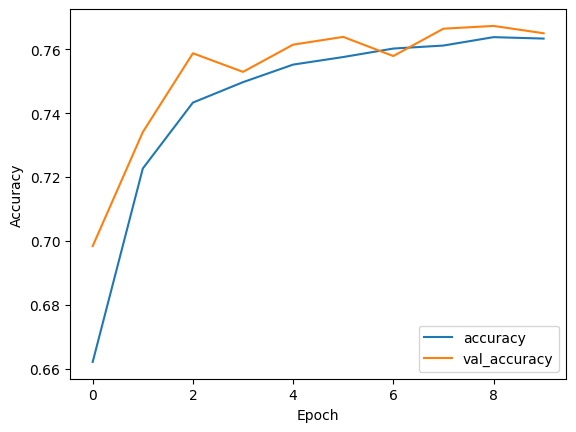

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D
X = df[['uses_ip', 'count_letters', 'length', 'count_digits', 
        'letter_digit_letter_count', 'digit_letter_digit_count', 
        'longest_word_length', 'domain_reputation', 
        'has_suspicious_keywords', 'has_subdomains','https']]
y = df['label']  

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)  # Impute validation data, do not fit again
X_train_cnn = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_valid_cnn = X_valid_imputed.reshape(X_valid_imputed.shape[0], X_valid_imputed.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_valid_cnn, y_valid))

y_train_pred_probs = model.predict(X_train_cnn)
y_valid_pred_probs = model.predict(X_valid_cnn)
y_train_pred = (y_train_pred_probs > 0.5).astype(int)
y_valid_pred = (y_valid_pred_probs > 0.5).astype(int)
train_error = 1 - accuracy_score(y_train, y_train_pred)
validation_error = 1 - accuracy_score(y_valid, y_valid_pred)
print("Train Error:", train_error)
print("Validation Error:", validation_error)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()